# Sentiment Analysis on Text Data using NLP

## Objective
Perform sentiment analysis on textual data (tweets/reviews) using Natural Language Processing techniques.

## Goals
- Data preprocessing and cleaning
- Text vectorization
- Model building
- Sentiment prediction
- Insights and visualization

## Tools Used
- Python
- Pandas, NumPy
- NLTK
- Scikit-learn
- Matplotlib, Seaborn


In [1]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import pandas as pd

df = pd.read_csv(
    "sentiment_data.csv",
    encoding='latin-1',
    header=None
)


In [10]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df.head()


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df.info()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,count
sentiment,
0,800000
4,800000


In [12]:
df['sentiment'] = df['sentiment'].replace(4, 1)

df['sentiment'].value_counts()


,count
sentiment,
0,800000
1,800000


In [13]:
df = df[['text', 'sentiment']]
df.head()


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [26]:
df = df.sample(100000, random_state=42)
df.shape


(100000, 3)

### Dataset Summary
- Total original tweets: 1.6 Million
- Balanced dataset:
  - 800K Positive
  - 800K Negative
- For faster processing, 100K samples were used.
- Sentiment labels converted:
  - 0 = Negative
  - 1 = Positive


In [15]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtags symbol
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,clean_text
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0,ahhh hope ok
750,"@misstoriblack cool , i have no tweet apps fo...",0,cool tweet app razr 2
766711,@TiannaChaos i know just family drama. its la...,0,know famili drama lamehey next time u hang kim...
285055,School email won't open and I have geography ...,0,school email wont open geographi stuff revis s...
705995,upper airways problem,0,upper airway problem


In [34]:
!pip install wordcloud


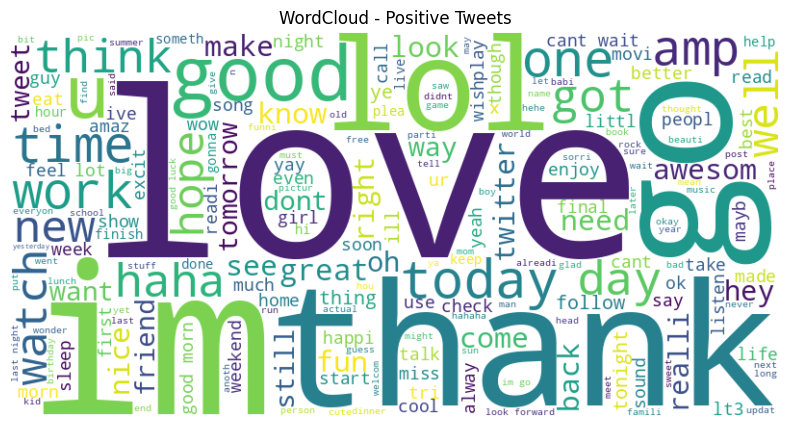

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive tweets
positive_text = " ".join(df[df['sentiment'] == 1]['clean_text'])

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Tweets")
plt.show()


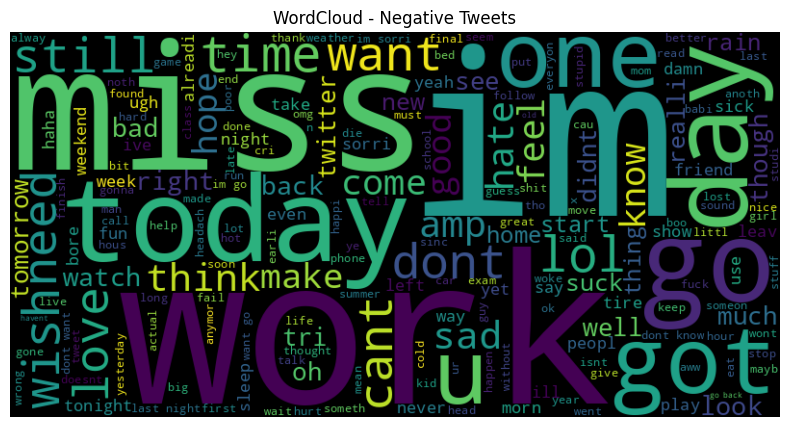

In [36]:
# Negative tweets
negative_text = " ".join(df[df['sentiment'] == 0]['clean_text'])

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Tweets")
plt.show()


### WordCloud Insights

- Positive tweets contain words like: love, good, happy, great.
- Negative tweets contain words like: sad, bad, hate, problem.
- WordCloud helps visualize the most frequent words contributing to sentiment.


In [16]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (80000,)
Testing size: (20000,)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1,2),   # Unigrams + Bigrams
    min_df=10,
    max_df=0.9
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=500)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.76685
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      9995
           1       0.76      0.79      0.77     10005

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7541


## Model Performance Analysis

- Logistic Regression Accuracy: ~76%
- Naive Bayes Accuracy: ~75%

The accuracy is moderate because:
- Twitter data is highly noisy and informal.
- Tweets are short and often contain sarcasm or mixed sentiment.
- Basic machine learning models were used without deep learning.

Despite moderate accuracy, the model successfully captures general sentiment trends and can be used for:
- Social media monitoring
- Customer opinion analysis
- Brand sentiment tracking
